In [1]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [2]:
def write(path, content):    
    with open(path, "a") as file:
        file.write(content)

In [3]:
def read(path):
    with open(path, "r") as file:
        return file.read()

In [9]:
%cd darknet

/home/adrian/development/machine-learning/object-detection/notebooks/yolo/darknet


In [4]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [21]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 2] No such file or directory: 'darknet'
/home/adrian/development/machine-learning/object-detection/notebooks/yolo/darknet


In [ ]:
sudo yay -Ss opencv2

In [ ]:
sudo yay -Ss cudnn

In [ ]:
sudo yay -Ss cudnn

In [23]:
# verify CUDA
!/opt/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


In [24]:
!sudo ln -s /opt/cuda /usr/local/cuda

ln: failed to create symbolic link '/usr/local/cuda/cuda': File exists


In [25]:
write(
".theanorc",
"""
[global]
floatX = float32
device = cuda

[dnn]
include_path=/opt/cuda/include/
library_path=/opt/cuda/lib64/
"""
)

In [ ]:
print(read(".theanorc"))

In [ ]:
# make darknet (build)
!make

In [31]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-19 20:31:40--  https://pjreddie.com/media/files/yolov3.weights
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   638KB/s    in 10m 33s 

2020-04-19 20:42:14 (383 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [11]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10020 (10020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 4.13.6
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64

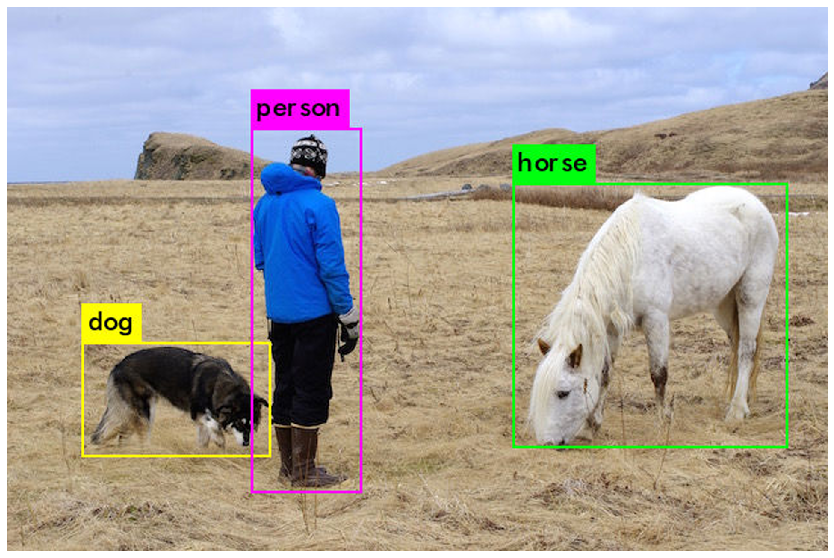

In [12]:
imShow('predictions.jpg')